In [24]:
# Open all four delta connectivity numpy arrays
# and plot the connectivity matrix for each

import numpy as np
import matplotlib.pyplot as plt

# Load the data
delta_connectivity_e11 = np.load('data/connectivity/expert_1_1/delta.npy')
delta_connectivity_e31 = np.load('data/connectivity/expert_3_1/delta.npy')
delta_connectivity_n11 = np.load('data/connectivity/novice_1_1/delta.npy')
delta_connectivity_n41 = np.load('data/connectivity/novice_4_1/delta.npy')

channel_names = list(np.load('data/connectivity/expert_1_1/channel_names.npy'))

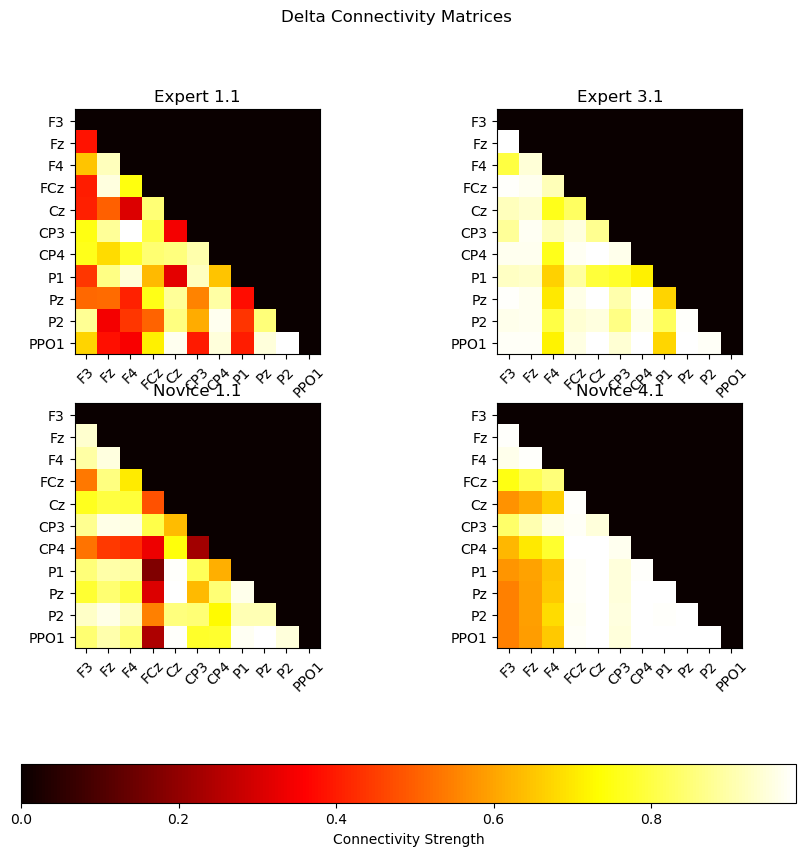

In [67]:
# Generate a new matrix only using the channels of interest. Ensure it is still upper triangular
channels_of_interest = ['F3', 'Fz', 'F4', 'FCz', 'Cz', 'CP3', 'CP4', 'P1', 'Pz', 'P2', 'PPO1']
channels_of_interest_indices = [channel_names.index(channel) for channel in channels_of_interest]
channels_of_interest_indices.sort()

delta_connectivity_e11_channels = delta_connectivity_e11[channels_of_interest_indices, :][:, channels_of_interest_indices]
delta_connectivity_e31_channels = delta_connectivity_e31[channels_of_interest_indices, :][:, channels_of_interest_indices]
delta_connectivity_n11_channels = delta_connectivity_n11[channels_of_interest_indices, :][:, channels_of_interest_indices]
delta_connectivity_n41_channels = delta_connectivity_n41[channels_of_interest_indices, :][:, channels_of_interest_indices]

# Plot all four matrices in a 2x2 grid with channel names as axes ticks
fig, axs = plt.subplots(2, 2)
# Set the size
fig.set_size_inches(10, 10)
fig.suptitle('Delta Connectivity Matrices')
axs[0, 0].imshow(delta_connectivity_e11_channels, cmap='hot', interpolation='nearest')
axs[0, 0].set_title('Expert 1.1')
axs[0, 0].set_xticks(range(len(channels_of_interest)))
axs[0, 0].set_xticklabels(channels_of_interest, rotation=45)
axs[0, 0].set_yticks(range(len(channels_of_interest)))
axs[0, 0].set_yticklabels(channels_of_interest)
axs[0, 1].imshow(delta_connectivity_e31_channels, cmap='hot', interpolation='nearest')
axs[0, 1].set_title('Expert 3.1')
axs[0, 1].set_xticks(range(len(channels_of_interest)))
axs[0, 1].set_xticklabels(channels_of_interest, rotation=45)
axs[0, 1].set_yticks(range(len(channels_of_interest)))
axs[0, 1].set_yticklabels(channels_of_interest)
axs[1, 0].imshow(delta_connectivity_n11_channels, cmap='hot', interpolation='nearest')
axs[1, 0].set_title('Novice 1.1')
axs[1, 0].set_xticks(range(len(channels_of_interest)))
axs[1, 0].set_xticklabels(channels_of_interest, rotation=45)
axs[1, 0].set_yticks(range(len(channels_of_interest)))
axs[1, 0].set_yticklabels(channels_of_interest)
axs[1, 1].imshow(delta_connectivity_n41_channels, cmap='hot', interpolation='nearest')
axs[1, 1].set_title('Novice 4.1')
axs[1, 1].set_xticks(range(len(channels_of_interest)))
axs[1, 1].set_xticklabels(channels_of_interest, rotation=45)
axs[1, 1].set_yticks(range(len(channels_of_interest)))
axs[1, 1].set_yticklabels(channels_of_interest)

# Add a colorbar
cbar = fig.colorbar(axs[0, 0].imshow(delta_connectivity_e11_channels, cmap='hot', interpolation='nearest'), ax=axs, orientation='horizontal')
cbar.set_label('Connectivity Strength')

plt.show()



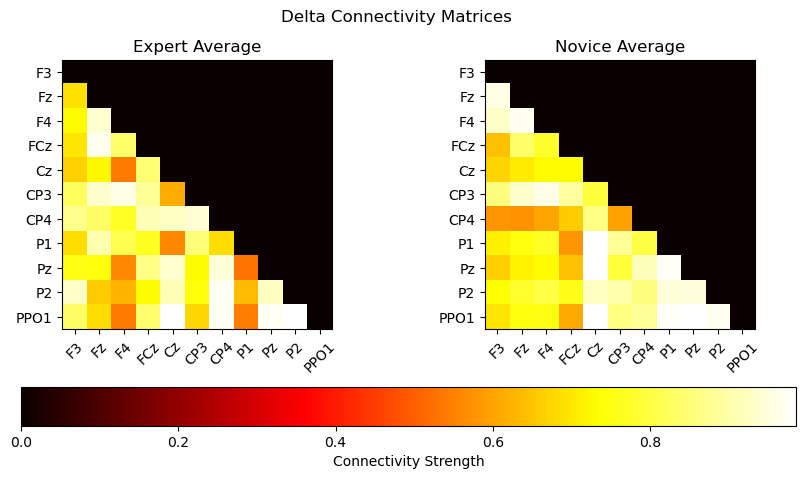

In [68]:
# Average the expert and novices
delta_connectivity_e = (delta_connectivity_e11_channels + delta_connectivity_e31_channels) / 2
delta_connectivity_n = (delta_connectivity_n11_channels + delta_connectivity_n41_channels) / 2

# Plot the average expert and novice matrices  
fig, axs = plt.subplots(1, 2)
# Set the size
fig.set_size_inches(10, 5)
fig.suptitle('Delta Connectivity Matrices')
axs[0].imshow(delta_connectivity_e, cmap='hot', interpolation='nearest')
axs[0].set_title('Expert Average')
axs[0].set_xticks(range(len(channels_of_interest)))
axs[0].set_xticklabels(channels_of_interest, rotation=45)
axs[0].set_yticks(range(len(channels_of_interest)))
axs[0].set_yticklabels(channels_of_interest)
axs[1].imshow(delta_connectivity_n, cmap='hot', interpolation='nearest')
axs[1].set_title('Novice Average')
axs[1].set_xticks(range(len(channels_of_interest)))
axs[1].set_xticklabels(channels_of_interest, rotation=45)
axs[1].set_yticks(range(len(channels_of_interest)))
axs[1].set_yticklabels(channels_of_interest)

# Add a colorbar
cbar = fig.colorbar(axs[0].imshow(delta_connectivity_e, cmap='hot', interpolation='nearest'), ax=axs, orientation='horizontal')
cbar.set_label('Connectivity Strength')

plt.show()



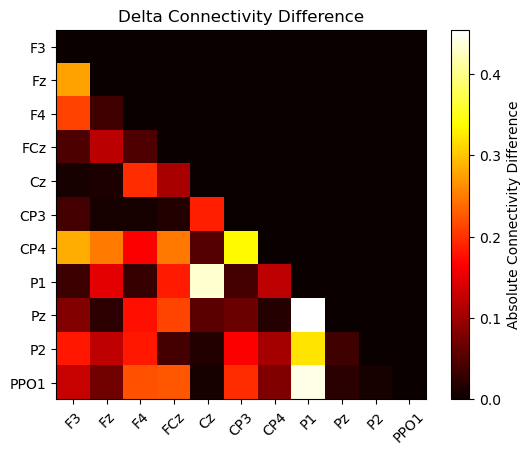

In [69]:
# Compute the absolute difference between the expert and novice matrices
delta_connectivity_diff = np.abs(delta_connectivity_e - delta_connectivity_n)

# Plot the difference matrix
plt.imshow(delta_connectivity_diff, cmap='hot', interpolation='nearest')
plt.title('Delta Connectivity Difference')
plt.xticks(range(len(channels_of_interest)), channels_of_interest, rotation=45)
plt.yticks(range(len(channels_of_interest)), channels_of_interest)
cbar = plt.colorbar(plt.imshow(delta_connectivity_diff, cmap='hot', interpolation='nearest'))
cbar.set_label('Absolute Connectivity Difference')
plt.show()


In [32]:
ch_names_to_keep = ['F3', 'Fz', 'F4', 'FCz', 'Cz', 'CP3', 'CP4', 'P1', 'Pz', 'P2', 'PPO1']
ids_to_keep = [channel_names.index(ch) for ch in ch_names_to_keep]
ids_to_zero = [i for i in range(len(channel_names)) if i not in ids_to_keep]

In [34]:
ids_to_keep

[4, 5, 6, 42, 15, 48, 49, 51, 25, 52, 92]

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.91848275, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.82956935, 0.93867675, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.81449723, 0.81880806, 0.76491484, ..., 0.        , 0.        ,
        0.        ],
       [0.80477157, 0.80101552, 0.7181584 , ..., 0.96761124, 0.        ,
        0.        ],
       [       nan,        nan,        nan, ...,        nan,        nan,
        0.        ]])

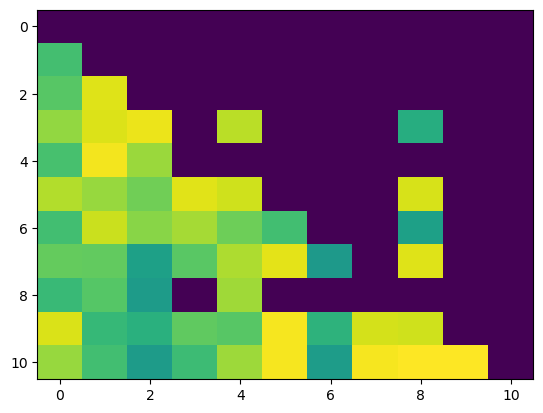

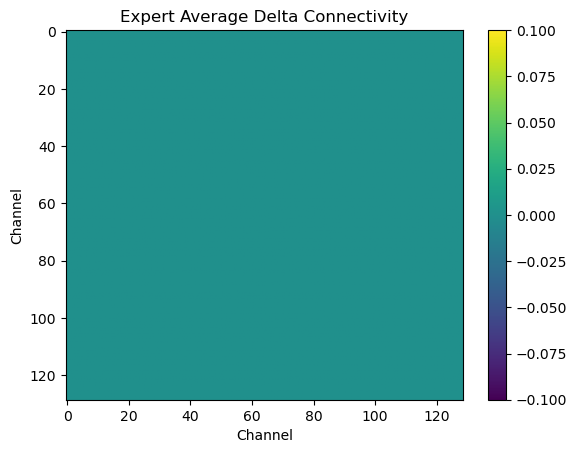

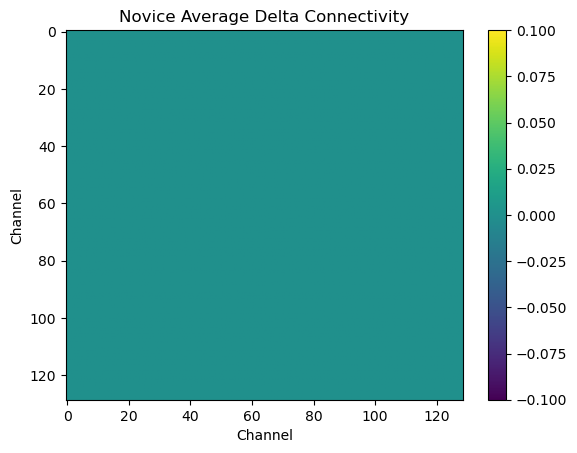

In [30]:


expert_average[:, ids_to_zero] = 0
expert_average[ids_to_zero, :] = 0


novice_average[:, ids_to_zero] = 0
novice_average[ids_to_zero, :] = 0

plt.imshow(expert_average, cmap='viridis', aspect='auto')
plt.colorbar()
plt.title('Expert Average Delta Connectivity')
plt.xlabel('Channel')
plt.ylabel('Channel')
plt.show()

plt.imshow(novice_average, cmap='viridis', aspect='auto')
plt.colorbar()
plt.title('Novice Average Delta Connectivity')
plt.xlabel('Channel')
plt.ylabel('Channel')
plt.show()

